In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st 
import featuretools as ft
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score,cross_validate, KFold, RepeatedKFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline

In [17]:
df = pd.read_csv('../data/ks-projects-201801.csv', index_col='ID')

In [18]:
display(df.describe())

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [19]:
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [12]:
df.corr()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
ID,1.000000,0.001679,0.000466,0.000654,-0.000633,-0.000025,0.001854
goal,0.001679,1.000000,0.007358,0.004012,0.005534,0.005104,0.942692
pledged,0.000466,0.007358,1.000000,0.717079,0.857370,0.952843,0.005024
backers,0.000654,0.004012,0.717079,1.000000,0.697426,0.752539,0.004517
usd pledged,-0.000633,0.005534,0.857370,0.697426,1.000000,0.907743,0.006172
usd_pledged_real,-0.000025,0.005104,0.952843,0.752539,0.907743,1.000000,0.005596
usd_goal_real,0.001854,0.942692,0.005024,0.004517,0.006172,0.005596,1.000000


In [13]:
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [20]:
df = df.drop(columns=['pledged','usd pledged','usd_pledged_real','backers'])

In [24]:
df = df.drop(columns=['goal'])

In [14]:
df = df.dropna(axis=0)

In [16]:
df.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [25]:
df

,name,category,main_category,currency,deadline,launched,state,country,usd_goal_real,period
ID,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,GB,1533.95,58
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,US,30000.00,59
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,US,45000.00,44
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,US,5000.00,29
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,2015-07-04 08:35:03,canceled,US,19500.00,55
...,...,...,...,...,...,...,...,...,...,...
999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,2014-09-17 02:35:30,canceled,US,50000.00,29
999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,2011-06-22 03:35:14,failed,US,1500.00,26
999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,2010-07-01 19:40:30,failed,US,15000.00,45


In [22]:
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched'])
df['period'] = (df['deadline'] - df['launched']).dt.days

In [26]:
df = df[df['period'] < 10000]

In [27]:
df = df.drop(columns=['deadline', 'launched'])

In [28]:
epsilon = 1e-5
df['log_usd_goal'] = df['usd_goal_real'].apply(lambda x: np.log10(x + epsilon))

In [23]:
df['state'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

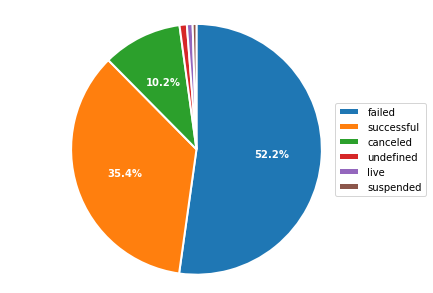

In [30]:
per_state = round(df['state'].value_counts()/ len(df['state']) *100,2)
values = list(per_state.values)

plt.figure(figsize=(5,5))
plt.pie(values,labels=list(per_state.index),
wedgeprops={'linewidth':2, 'edgecolor':'white'},
textprops={'color':'white', 'weight':'bold'},
counterclock=False, startangle=90,
autopct=lambda p: '{:.1f}%'.format(p) if p >= 2.5 else '')
lgnd = plt.legend(bbox_to_anchor=(1.0,0.25,1.55,0.5), loc='center left',borderaxespad=0.)
plt.axis('equal')
plt.show()


In [32]:
df = df[(df['state']=='successful') | (df['state'] == 'failed')]

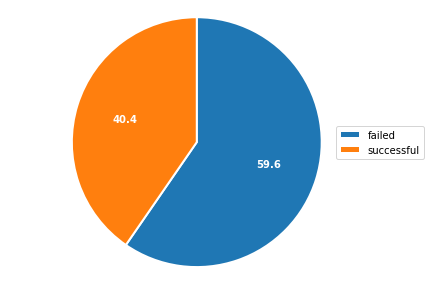

In [36]:
per_state = round(df['state'].value_counts()/ len(df['state'])*100,2)
values = list(per_state.values)

plt.figure(figsize=(5,5))
plt.pie(values, labels=list(per_state.index),
wedgeprops={'linewidth':2, 'edgecolor':'white'},
textprops={'color':'white', 'weight': 'bold'},
counterclock=False, startangle=90,
autopct=lambda p: '{:.1f}'.format(p) if p >=2.5 else '')
lgnd = plt.legend(bbox_to_anchor=(1.0,0.25,1.55,0.5), loc='center left', borderaxespad=0.)
plt.axis('equal')
plt.show()

In [37]:
for col,dtype in df.dtypes.items():
    if dtype == 'object':
        print(col)

name
category
main_category
currency
state
country


In [38]:
# 連関係数を求める関数
def cramer_coef(x):
    chi2 = st.chi2_contingency(x)[0]
    return np.sqrt(chi2 / x.sum() / (min(x.shape) - 1))

In [41]:
# cateofry vs main_category
ct_category = pd.crosstab(df['category'], df['main_category'])
cramer_coef(ct_category.to_numpy())

0.9862372840283602

In [42]:
df = df.drop(columns=['category'])

In [43]:
# country vs cuurency
ct_country = pd.crosstab(df['country'], df['currency'])
cramer_coef(ct_country.to_numpy())

0.9995956562579831

In [44]:
df.isnull().sum()

name             3
main_category    0
currency         0
state            0
country          0
usd_goal_real    0
period           0
log_usd_goal     0
dtype: int64

In [45]:
df = df.dropna(axis=0)

In [46]:
for col, dtype in df.dtypes.items():
    if dtype == 'object':
        print(col)
        display(df[col].value_counts())

name


New EP/Music Development                                        15
Music Video                                                     11
New EP / Music Development                                      10
Debut Album                                                      9
Reflections                                                      9
                                                                ..
Apulia's travelogue                                              1
The Central Ohio Premiere of Romance/Romance!                    1
"Becoming an Entrepreneur" Infographic Book                      1
Jeremy Arndt - "Journeys: Handpan Solo" - my new CD project!     1
Nou Renmen Ayiti!  We Love Haiti!                                1
Name: name, Length: 329594, dtype: int64

main_category


Film & Video    56526
Music           45949
Publishing      35445
Games           28520
Technology      27050
Art             25640
Design          25364
Food            22054
Fashion         19775
Theater         10242
Comics           9878
Photography      9689
Crafts           7818
Journalism       4149
Dance            3573
Name: main_category, dtype: int64

currency


USD    261509
GBP     29475
EUR     14378
CAD     12375
AUD      6621
SEK      1510
MXN      1411
NZD      1274
DKK       929
CHF       652
NOK       584
HKD       477
SGD       454
JPY        23
Name: currency, dtype: int64

state


failed        197716
successful    133956
Name: state, dtype: int64

country


US      261358
GB       29453
CA       12370
AU        6616
DE        3436
FR        2520
NL        2411
IT        2369
ES        1873
SE        1509
MX        1411
NZ        1274
DK         926
IE         683
CH         652
NO         582
BE         523
AT         485
HK         477
SG         454
N,0"       210
LU          57
JP          23
Name: country, dtype: int64

In [49]:
df[df['country'] == 'N,0"']['currency'].value_counts()

USD    151
GBP     22
EUR     21
CAD      5
AUD      5
DKK      3
NOK      2
SEK      1
Name: currency, dtype: int64

In [50]:
df = df.drop(columns=['country'])

In [52]:
df['n_words'] = df['name'].apply(lambda x: len(str(x).split(' '))) 

In [53]:
df = df.drop(columns=['name'])

In [55]:
df = pd.get_dummies(df, drop_first=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331672 entries, 1000002330 to 999988282
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   usd_goal_real               331672 non-null  float64
 1   period                      331672 non-null  int64  
 2   log_usd_goal                331672 non-null  float64
 3   n_words                     331672 non-null  int64  
 4   main_category_Comics        331672 non-null  uint8  
 5   main_category_Crafts        331672 non-null  uint8  
 6   main_category_Dance         331672 non-null  uint8  
 7   main_category_Design        331672 non-null  uint8  
 8   main_category_Fashion       331672 non-null  uint8  
 9   main_category_Film & Video  331672 non-null  uint8  
 10  main_category_Food          331672 non-null  uint8  
 11  main_category_Games         331672 non-null  uint8  
 12  main_category_Journalism    331672 non-null  uint8  
 13  ma

In [57]:
df = df.drop(columns=['usd_goal_real'])

In [60]:
X = df.drop(columns=['state_successful'])
y = df['state_successful']
lr_clf = SGDClassifier(loss='log_loss', penalty='none', max_iter=10000, fit_intercept=True, random_state=0, tol=1e-3)
lr_clf.fit(X,y)
y_pred = lr_clf.predict(X)

In [61]:
acc = accuracy_score(y,y_pred)
precision = precision_score(y,y_pred)
recall = recall_score(y,y_pred)
f_1 = f1_score(y,y_pred)

print(f'正解率: {acc:.3}')
print(f'precision: {precision:.3}')
print(f'recall: {recall:.3}')
print(f'F1: {f_1:.3}')


正解率: 0.638
precision: 0.65
recall: 0.224
F1: 0.334


## モデルの検証

In [65]:
X = df.drop(columns=['state_successful'])
y = df['state_successful']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
lr_clf = SGDClassifier(loss='log_loss',max_iter=10000, random_state=0, tol=1e-3)
lr_clf.fit(X_train,y_train)
y_pred = lr_clf.predict(X_test)

In [67]:
acc = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f_1 = f1_score(y_test,y_pred)

print(f'正解率: {acc:.3}')
print(f'precision: {precision:.3}')
print(f'recall: {recall:.3}')
print(f'F1: {f_1:.3}')

正解率: 0.625
precision: 0.686
recall: 0.124
F1: 0.21


In [72]:
std = StandardScaler()
X_train.loc[:, ['log_usd_goal','period']] = std.fit_transform(X_train.loc[:,['log_usd_goal','period']])
X_test.loc[:, ['log_usd_goal','period']] = std.fit_transform(X_test.loc[:, ['log_usd_goal','period']])

In [73]:
lr_clf = SGDClassifier(loss='log_loss',max_iter=10000,fit_intercept=True,random_state=1234, tol=1e-3)
lr_clf.fit(X_train,y_train)
y_pred =  lr_clf.predict(X_test)

acc = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f_1 = f1_score(y_test,y_pred)

print(f'正解率: {acc:.3}')
print(f'precision: {precision:.3}')
print(f'recall: {recall:.3}')
print(f'F1: {f_1:.3}')

正解率: 0.616
precision: 0.516
recall: 0.724
F1: 0.603


In [68]:
X = df.drop(columns='state_successful')
y = df['state_successful']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
Pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('liner_model', LogisticRegression())])
Pipeline.fit(X_train,y_train)
y_pred = Pipeline.predict(X_test)
cv = KFold(n_splits=5,shuffle=True, random_state=0)
scores = cross_val_score(Pipeline,X,y,scoring='neg_mean_squared_error', cv=cv)

In [70]:
print(np.mean(scores))

-0.3461281125445808


In [71]:
acc = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f_1 = f1_score(y_test,y_pred)

print(f'正解率: {acc:.3}')
print(f'precision: {precision:.3}')
print(f'recall: {recall:.3}')
print(f'F1: {f_1:.3}')

正解率: 0.655
precision: 0.6
recall: 0.427
F1: 0.499


## 正則化・ハイパーパラメータ探索

In [78]:
kf = KFold(n_splits=5, shuffle=True, random_state=1234)
degree = 2
poly = PolynomialFeatures(degree)

parameters = {'clf__alpha': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5], 'clf__penalty': ['l1', 'l2']}

clf_pl = Pipeline([("poly", poly), ("clf", SGDClassifier(loss='log', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3))])

grid = GridSearchCV(clf_pl, param_grid=parameters, 
                         cv=kf, 
                         scoring='accuracy', 
                         verbose=3) 

grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 1/5] END ...clf__alpha=0.1, clf__penalty=l1;, score=0.619 total time= 3.4min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 2/5] END ...clf__alpha=0.1, clf__penalty=l1;, score=0.641 total time= 1.1min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 3/5] END ...clf__alpha=0.1, clf__penalty=l1;, score=0.634 total time=36.3min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 4/5] END ...clf__alpha=0.1, clf__penalty=l1;, score=0.624 total time= 2.0min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 5/5] END ...clf__alpha=0.1, clf__penalty=l1;, score=0.615 total time=  41.1s


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 1/5] END ...clf__alpha=0.1, clf__penalty=l2;, score=0.644 total time= 1.5min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 2/5] END ...clf__alpha=0.1, clf__penalty=l2;, score=0.649 total time= 1.7min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 3/5] END ...clf__alpha=0.1, clf__penalty=l2;, score=0.641 total time= 1.6min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 4/5] END ...clf__alpha=0.1, clf__penalty=l2;, score=0.650 total time= 1.7min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 5/5] END ...clf__alpha=0.1, clf__penalty=l2;, score=0.649 total time= 1.5min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 1/5] END ..clf__alpha=0.01, clf__penalty=l1;, score=0.626 total time=  21.7s


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 2/5] END ..clf__alpha=0.01, clf__penalty=l1;, score=0.620 total time= 5.9min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 3/5] END ..clf__alpha=0.01, clf__penalty=l1;, score=0.466 total time= 6.7min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 4/5] END ..clf__alpha=0.01, clf__penalty=l1;, score=0.619 total time= 4.0min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 5/5] END ..clf__alpha=0.01, clf__penalty=l1;, score=0.648 total time=33.3min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 1/5] END ..clf__alpha=0.01, clf__penalty=l2;, score=0.642 total time= 1.9min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 2/5] END ..clf__alpha=0.01, clf__penalty=l2;, score=0.633 total time= 3.7min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 3/5] END ..clf__alpha=0.01, clf__penalty=l2;, score=0.642 total time= 3.7min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 4/5] END ..clf__alpha=0.01, clf__penalty=l2;, score=0.563 total time= 3.7min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 5/5] END ..clf__alpha=0.01, clf__penalty=l2;, score=0.547 total time= 3.1min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 1/5] END .clf__alpha=0.001, clf__penalty=l1;, score=0.627 total time= 3.4min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 2/5] END .clf__alpha=0.001, clf__penalty=l1;, score=0.553 total time= 3.9min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 3/5] END .clf__alpha=0.001, clf__penalty=l1;, score=0.647 total time= 3.4min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 4/5] END clf__alpha=0.001, clf__penalty=l1;, score=0.596 total time=1282.8min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 5/5] END .clf__alpha=0.001, clf__penalty=l1;, score=0.645 total time=18.4min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 1/5] END .clf__alpha=0.001, clf__penalty=l2;, score=0.609 total time= 3.3min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 2/5] END .clf__alpha=0.001, clf__penalty=l2;, score=0.587 total time= 4.7min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 3/5] END .clf__alpha=0.001, clf__penalty=l2;, score=0.637 total time= 3.7min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 4/5] END .clf__alpha=0.001, clf__penalty=l2;, score=0.502 total time= 3.4min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 5/5] END .clf__alpha=0.001, clf__penalty=l2;, score=0.518 total time= 4.4min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 1/5] END clf__alpha=0.0001, clf__penalty=l1;, score=0.589 total time= 5.1min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 2/5] END clf__alpha=0.0001, clf__penalty=l1;, score=0.602 total time= 4.6min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 3/5] END clf__alpha=0.0001, clf__penalty=l1;, score=0.617 total time= 3.6min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 4/5] END clf__alpha=0.0001, clf__penalty=l1;, score=0.613 total time= 5.2min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 5/5] END clf__alpha=0.0001, clf__penalty=l1;, score=0.550 total time= 4.5min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 1/5] END clf__alpha=0.0001, clf__penalty=l2;, score=0.609 total time= 5.2min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 2/5] END clf__alpha=0.0001, clf__penalty=l2;, score=0.603 total time= 2.8min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 3/5] END clf__alpha=0.0001, clf__penalty=l2;, score=0.407 total time= 3.2min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 4/5] END clf__alpha=0.0001, clf__penalty=l2;, score=0.594 total time= 3.7min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 5/5] END clf__alpha=0.0001, clf__penalty=l2;, score=0.615 total time= 4.2min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 1/5] END .clf__alpha=1e-05, clf__penalty=l1;, score=0.461 total time= 4.1min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 2/5] END .clf__alpha=1e-05, clf__penalty=l1;, score=0.644 total time= 2.8min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 3/5] END .clf__alpha=1e-05, clf__penalty=l1;, score=0.482 total time= 5.4min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 4/5] END .clf__alpha=1e-05, clf__penalty=l1;, score=0.482 total time= 4.3min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 5/5] END .clf__alpha=1e-05, clf__penalty=l1;, score=0.613 total time= 5.2min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 1/5] END .clf__alpha=1e-05, clf__penalty=l2;, score=0.643 total time= 1.9min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 2/5] END .clf__alpha=1e-05, clf__penalty=l2;, score=0.558 total time= 3.6min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 3/5] END .clf__alpha=1e-05, clf__penalty=l2;, score=0.604 total time= 3.5min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 4/5] END .clf__alpha=1e-05, clf__penalty=l2;, score=0.644 total time= 3.6min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


[CV 5/5] END .clf__alpha=1e-05, clf__penalty=l2;, score=0.617 total time= 3.0min


c:\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=5, random_state=1234, shuffle=True),
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('clf',
                                        SGDClassifier(loss='log',
                                                      max_iter=10000,
                                                      random_state=1234))]),
             param_grid={'clf__alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'clf__penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)